In [1]:
import pandas as pd

roi_signals_6mm = pd.read_csv("out02_roi_signals_merge/roi_signals_6mm.txt", sep = ',')
roi_signals_10mm = pd.read_csv("out02_roi_signals_merge/roi_signals_10mm.txt", sep = ',')

subject_info = pd.read_csv("age_gender_edu.txt", sep = ',')
# subject_info2 = pd.read_csv("cc_scan_2_matching.csv", sep = ',')

data = subject_info.merge(roi_signals_10mm, left_on = 'cc_post_intake_id', right_on = 'subj')
# data.replace({'group': {'NTHC': 1, 'TEHC': 2}}, inplace = True)


In [20]:
pd.set_option('display.max_rows', 100)
## We still have some NaN values (after ignoring them in the beta map)
## Ignore NaN: abs(image), 
# replace nan by 0 (-nan command of fslmaths), 
# multiply roi mask, 
# binarize (-bin command of fslmaths)

# data.loc[data['roi'] == 'R_IFJ', :]
data.loc[data['beta_value'].isna(),:]

,cc_post_intake_id,gender,age,yrs_of_edu,subj,group,roi,beta_value
57,1023,1,29,18,1023,NTHC,L_pMFG,NaN
58,1023,1,29,18,1023,NTHC,R_FEF,NaN
59,1023,1,29,18,1023,NTHC,R_M1,NaN
60,1023,1,29,18,1023,NTHC,R_pMFG,NaN
61,1023,1,29,18,1023,NTHC,R_preSMA,NaN
116,1037,1,21,15,1037,NTHC,L_Fp,NaN
156,1043,1,20,13,1043,NTHC,L_Fp,NaN
186,1050,2,51,14,1050,NTHC,L_Fp,NaN
190,1050,2,51,14,1050,NTHC,R_Fp,NaN
215,1055,1,23,16,1055,NTHC,L_Fp,NaN


In [23]:
# check number of samples for each gender (there are more males than females)
# 1: male, 2: female.
data.replace({'gender': {1: 'male', 2: 'female'}}, inplace = True)
data.groupby('gender').count()


,cc_post_intake_id,age,yrs_of_edu,subj,group,roi,beta_value
gender,,,,,,,
female,308,308,308,308,308,308,281
male,446,446,446,446,446,446,393


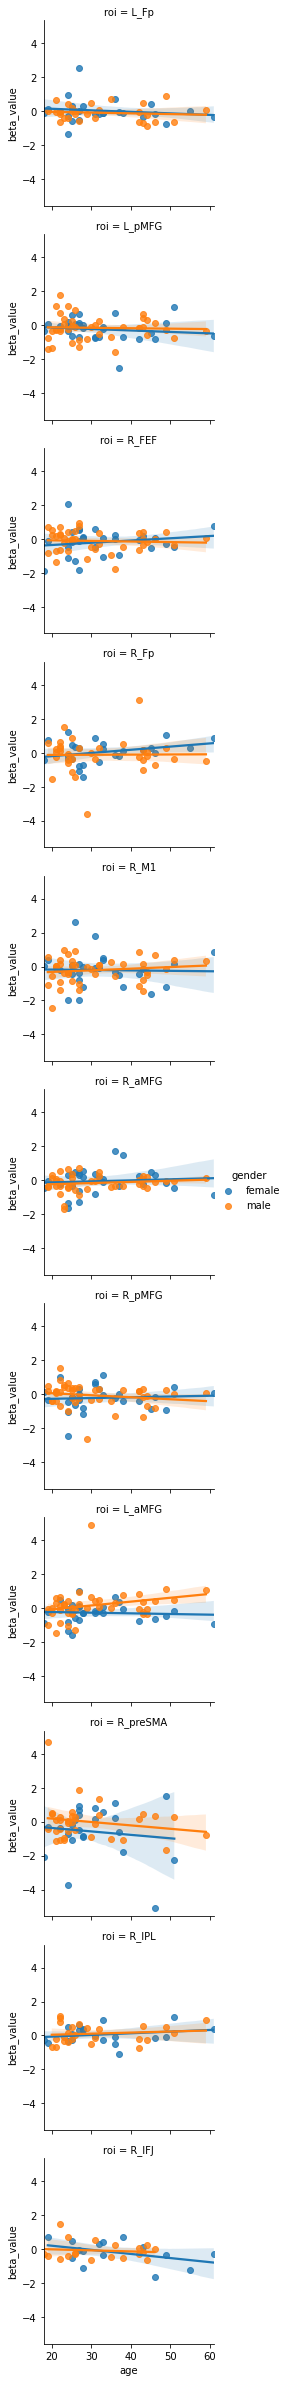

In [8]:
import seaborn as sns

## calculate pearson's r and correlation
## no interaction betweeen gender and age/yrs_of_edu

## age, gender, yrs_of_edu

sns.lmplot(
    data=data, x="age", y="beta_value", hue = 'gender', row="roi", height=3,
)

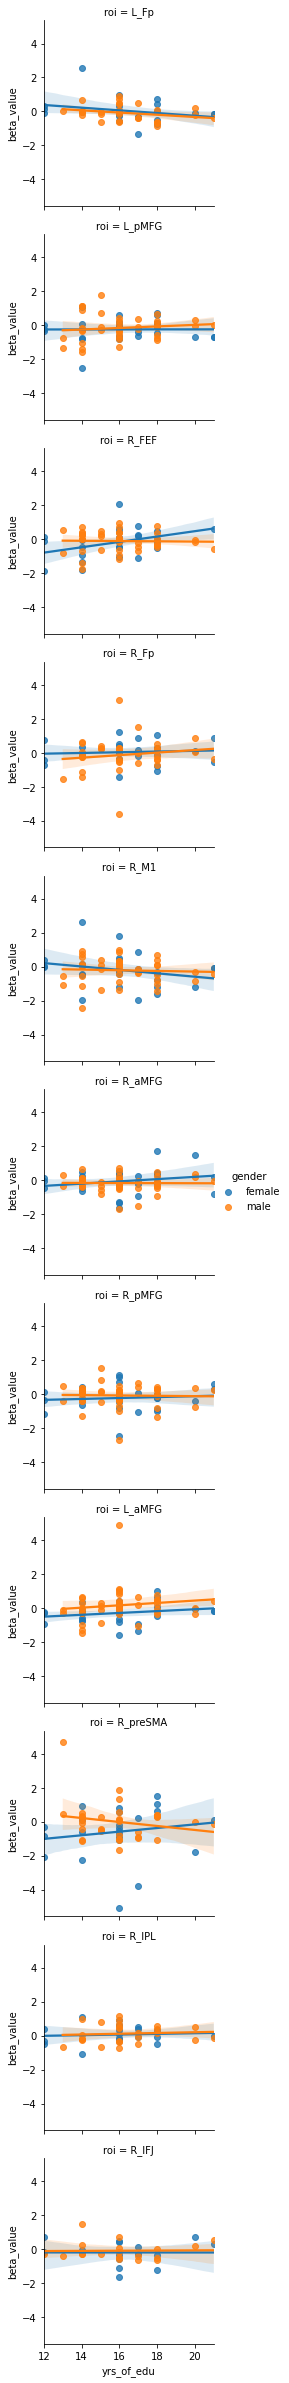

In [9]:
sns.lmplot(
    data=data, x="yrs_of_edu", y="beta_value", hue = 'gender', row="roi", height=3,
)

In [15]:
import statsmodels.api as sm

# backward selection

data.replace({'gender': {'male': 1, 'female': 2}}, inplace = True)

roi_list = data.roi.unique()

for roi in roi_list:
    print(roi)
    X = data.loc[(data['roi'] == roi) & (~data['beta_value'].isna()), ['gender', 'age', 'yrs_of_edu']]
    y = data.loc[(data['roi'] == roi) & (~data['beta_value'].isna()), ['beta_value']]
    
    if len(y) < 20: continue

    X = sm.add_constant(X) # adding a constant

    model = sm.OLS(y, X).fit()
    predictions = model.predict(X) 

    print_model = model.summary()
    print(print_model)
        

L_Fp
                            OLS Regression Results                            
Dep. Variable:             beta_value   R-squared:                       0.085
Model:                            OLS   Adj. R-squared:                  0.030
Method:                 Least Squares   F-statistic:                     1.546
Date:                Tue, 06 Dec 2022   Prob (F-statistic):              0.214
Time:                        15:38:50   Log-Likelihood:                -44.561
No. Observations:                  54   AIC:                             97.12
Df Residuals:                      50   BIC:                             105.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9836      0.627      1.569    